# **Project Title**:  Market Segmentation in Insurance

# **Group Members**: 
  1. **Sai Himaja Kinthada- sk3355** 
  2.  **Lekha Madhuri Bollineni - lmb28**


## 1. Overview
In this report we aim to understand and discover patterns, structures, and relationships in the data.

We perform the Exploratory data analysis, Data Cleaning and Visualization.

### Data Description :
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### Attribute Information :
Following is the Data Dictionary for customer's credit card dataset :-

**CUSTID** : Identification of Credit Card holder (Categorical)

**BALANCE** : Balance amount left in their account to make purchases

**BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFFPURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTSPURCHASES** : Amount of purchase done in installment

**CASHADVANCE** : Cash in advance given by the user

**PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASESTRX** : Numbe of purchase transactions made

**CREDITLIMIT** : Limit of Credit Card for user

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user

**PRCFULLPAYMENT** : Percent of full payment paid by user

**TENURE** : Tenure of credit card service for user


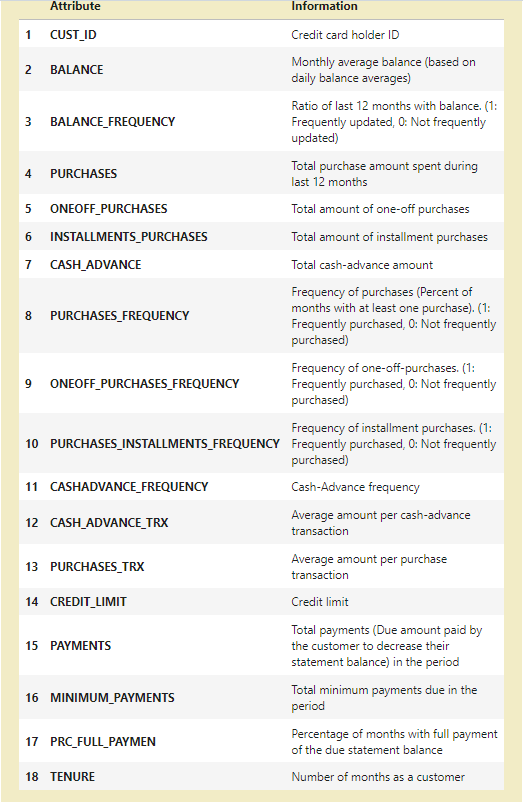

In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.colors
   
colors = ["#B71C1B","#D72A2B","#F2ECC6","#D5D68A","#A6AD3C","#798517"]
colors1 = ["#B71C1B","#D72A2B","#D5D68A","#A6AD3C","#798517"]
colors2 = ["#F2ECC6","#D5D68A","#A6AD3C","#798517","#D72A2B"]
cmap = matplotlib.colors.ListedColormap(colors2)



/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv


## 2. Importing Libraries 

In [144]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabasz_score
#-----------------------------------------

# Data
import pandas as pd
import numpy as np
from scipy import stats

# Collections library for counting elements in a list
from collections import Counter

# tqdm library for progress bars
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from termcolor import colored

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from itertools import product
#----------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xg

# scipy library for hierarchical clustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from scipy.cluster import hierarchy




# yellowbrick library for visualizing elbow and silhouette plots for clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# sklearn library
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Scaling
from sklearn.preprocessing import StandardScaler

# ignoring the warnings while executing codes
import warnings
warnings.filterwarnings('ignore')

## 3.Loading The Dataset

In [145]:
df = pd.read_csv('/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 4.Exploratory Data Analysis:

In [146]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [147]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [148]:
df.shape

(8950, 18)

In [149]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [150]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Insights from this:

* **The average balance across all customers is around 1,564.47, with a minimum balance of 0 and a maximum balance of 19,043.14.**

* **On average, customers make purchases worth 1,003.20, with a minimum of 0 and a maximum of 49,039.57.**

* **The average credit limit is 4,494.45, with a minimum of 50 and a maximum of 30,000.**

* **The average payment made by customers is 1,733.14, with a minimum of 0 and a maximum of 50,721.48.**

* **86.32% of customers have a minimum payment amount, with an average of 864.21.**

* **15.37% of customers pay their balance in full each month.**

* **Customers have an average tenure (i.e., how long they have been a customer) of 11.52 months.**

## 5. Data Visualization

In [151]:
# find all columns having missing values
missing_var = [var for var in df.columns if df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

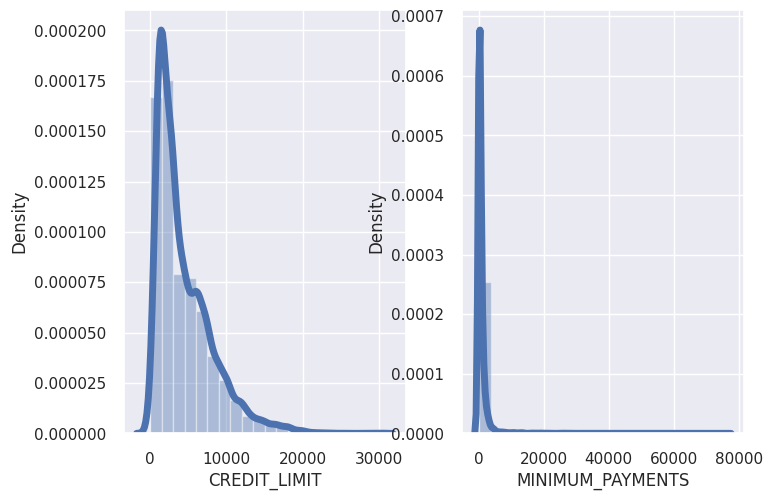

In [152]:
# see normal distribution of columns having null value
sns.set()
for i,var in enumerate(missing_var):
  plt.subplot(1,2,i+1)
  sns.distplot(df[var],bins=20,kde_kws={'linewidth':5})

In [153]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [154]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

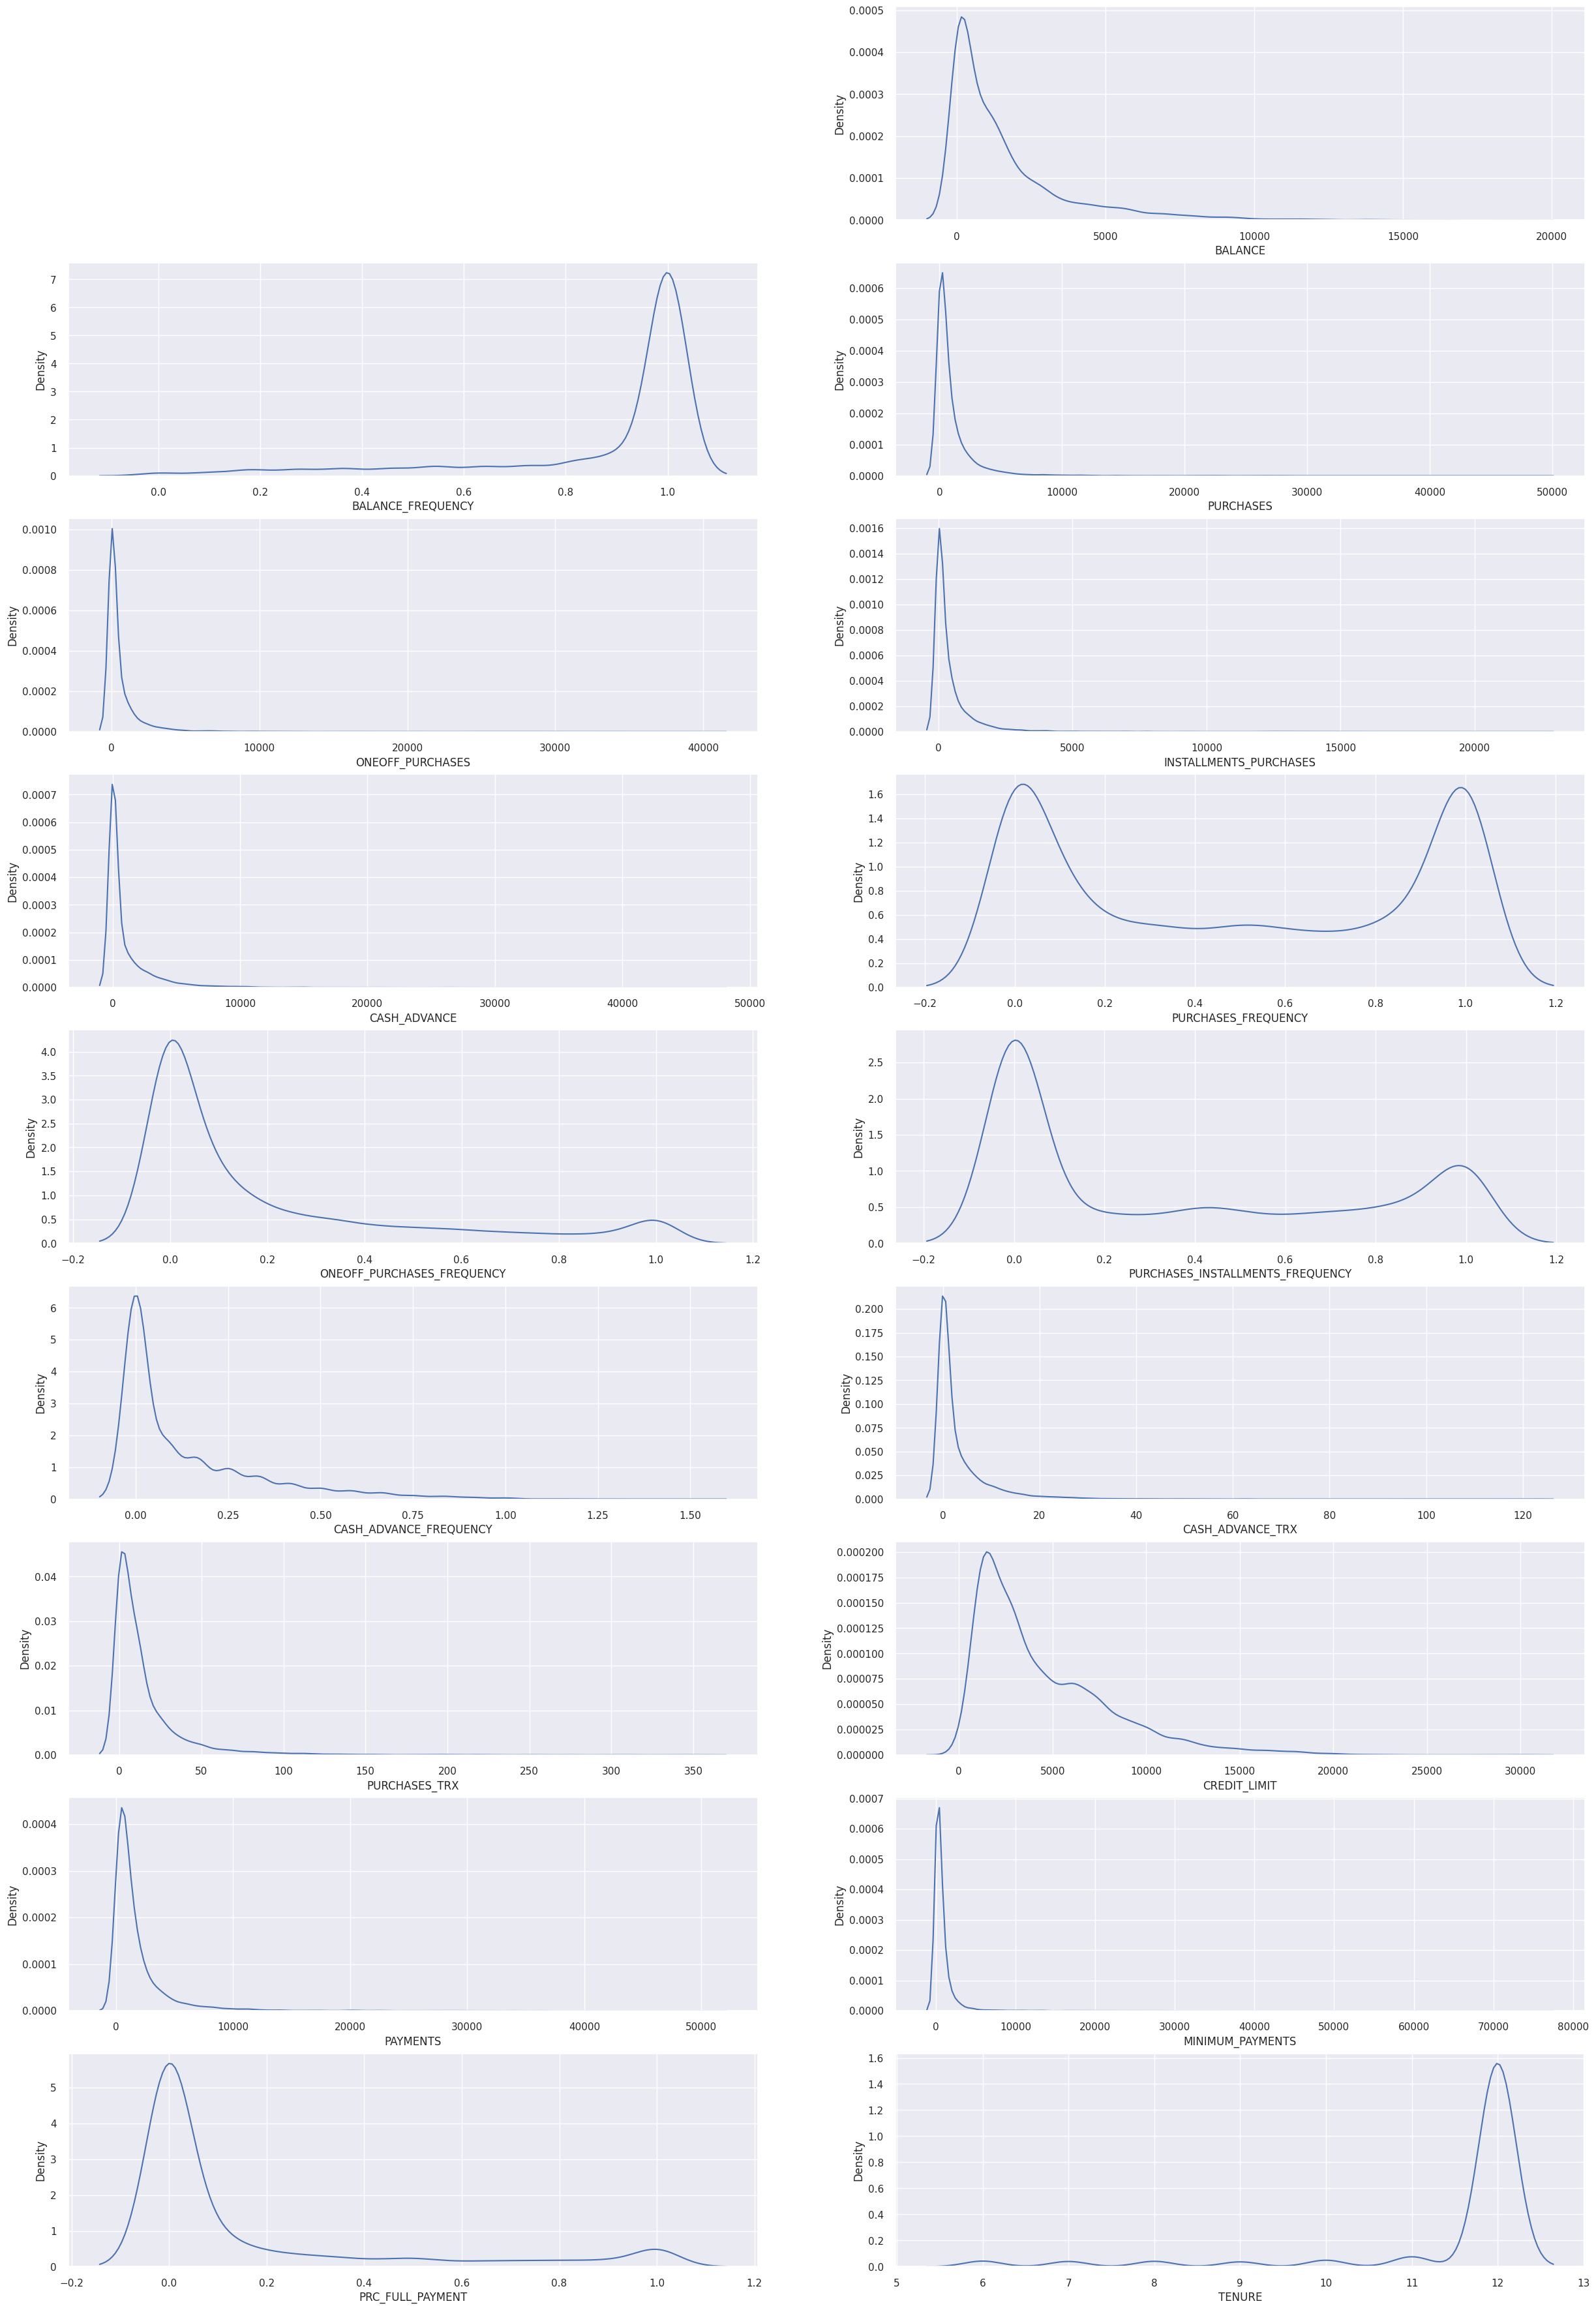

In [155]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

###  Drop unnecessary columns
CUST_ID seems not to be used anywhere, so we will drop it

In [156]:
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [157]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [167]:
df.duplicated().sum()

0

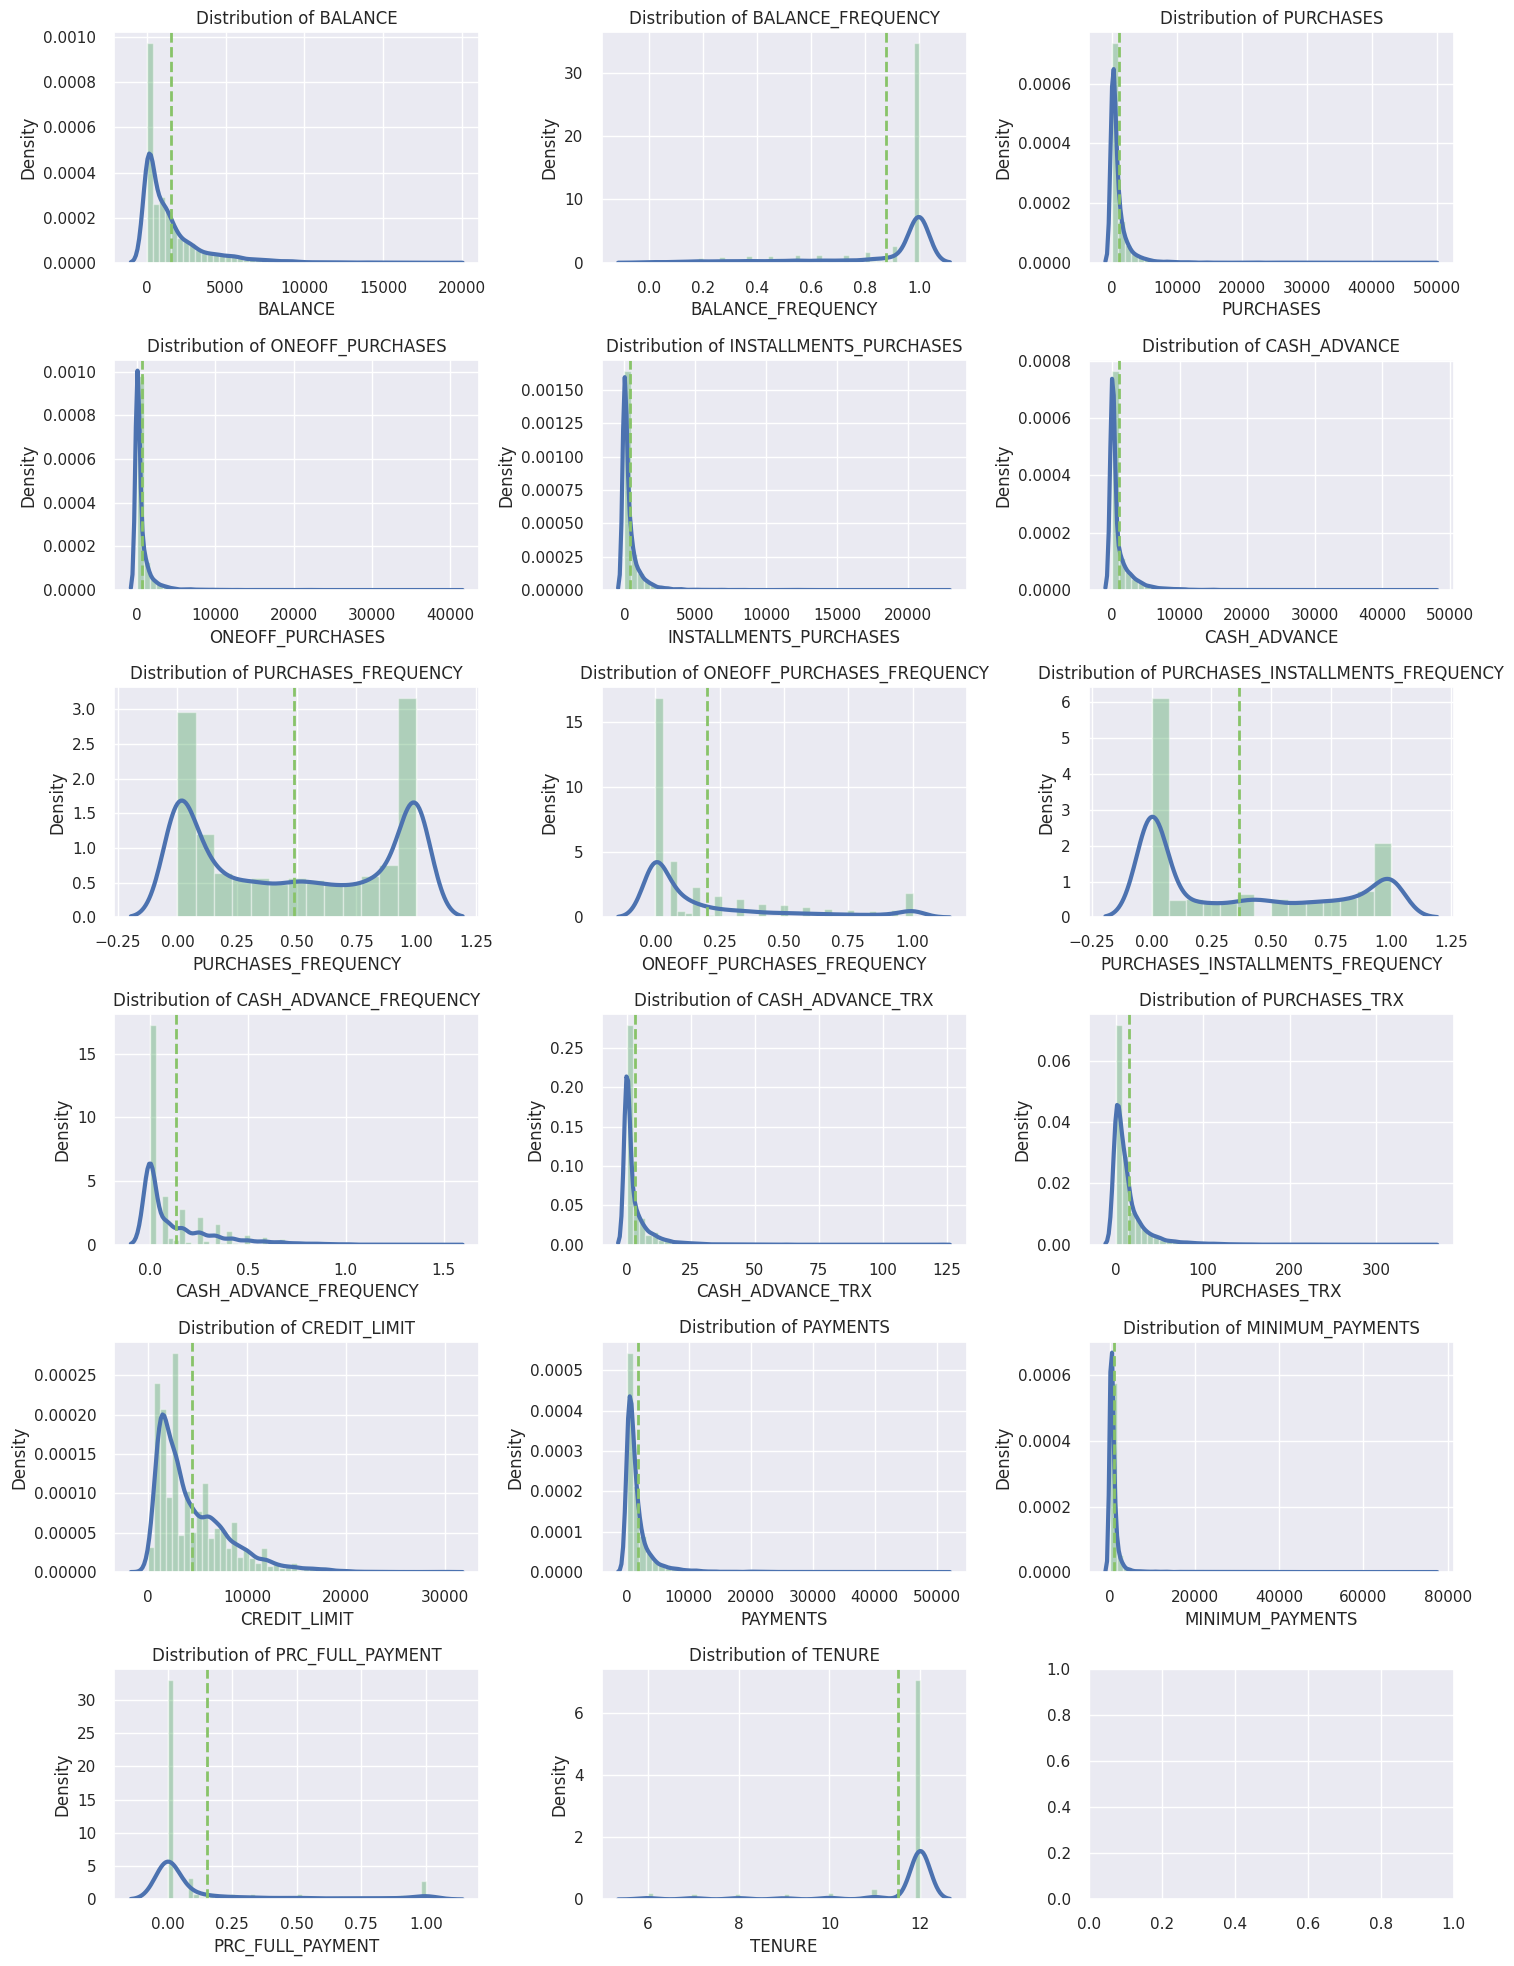

In [158]:
# # visualise probability density of all columns
# plt.figure(figsize=(10,50))
# for i in range(len(df.columns)):
#   plt.subplot(17,1,i+1)
#   sns.distplot(df[df.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
#   plt.title(df.columns[i])
# plt.tight_layout()
# # This is to ignore warning
# import warnings
# warnings.filterwarnings('ignore')

# Create subplots for all features
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,20))
sns.set_style('darkgrid')

for i, column in enumerate(df.columns):
    sns.distplot(df[column] ,kde_kws= {"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"},ax=axes[i//3, i%3])
    axes[i//3, i%3].axvline(x=df[column].mean(), color='#88c369', linestyle='--', linewidth=2)
    axes[i//3, i%3].set_title('Distribution of '+ column)
    
fig.suptitle('', fontsize=16)
fig.tight_layout()


## 5. Outlier Detection

In [159]:
for i in df.select_dtypes(include=['float64','int64']).columns:
  max_thresold = df[i].quantile(0.95)
  min_thresold = df[i].quantile(0.05)
  df_no_outlier = df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((df.shape[0]-df_no_outlier[0])/df.shape[0])*100),"%")
        
  

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [160]:
# remove outliers from columns having nearly 10% outlier
max_thresold_BALANCE = df["BALANCE"].quantile(0.95)
min_thresold_BALANCE = df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.05)
df_no_outlier = df[(df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) 
                                         & (df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT)
                                         & (df["BALANCE"] < max_thresold_BALANCE) 
                                         & (df["BALANCE"] > min_thresold_BALANCE) 
                                         &  (df["PAYMENTS"] < max_thresold_PAYMENTS) 
                                         & (df["PAYMENTS"] > min_thresold_PAYMENTS)]
# DataFrame having no outlier
df_no_outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


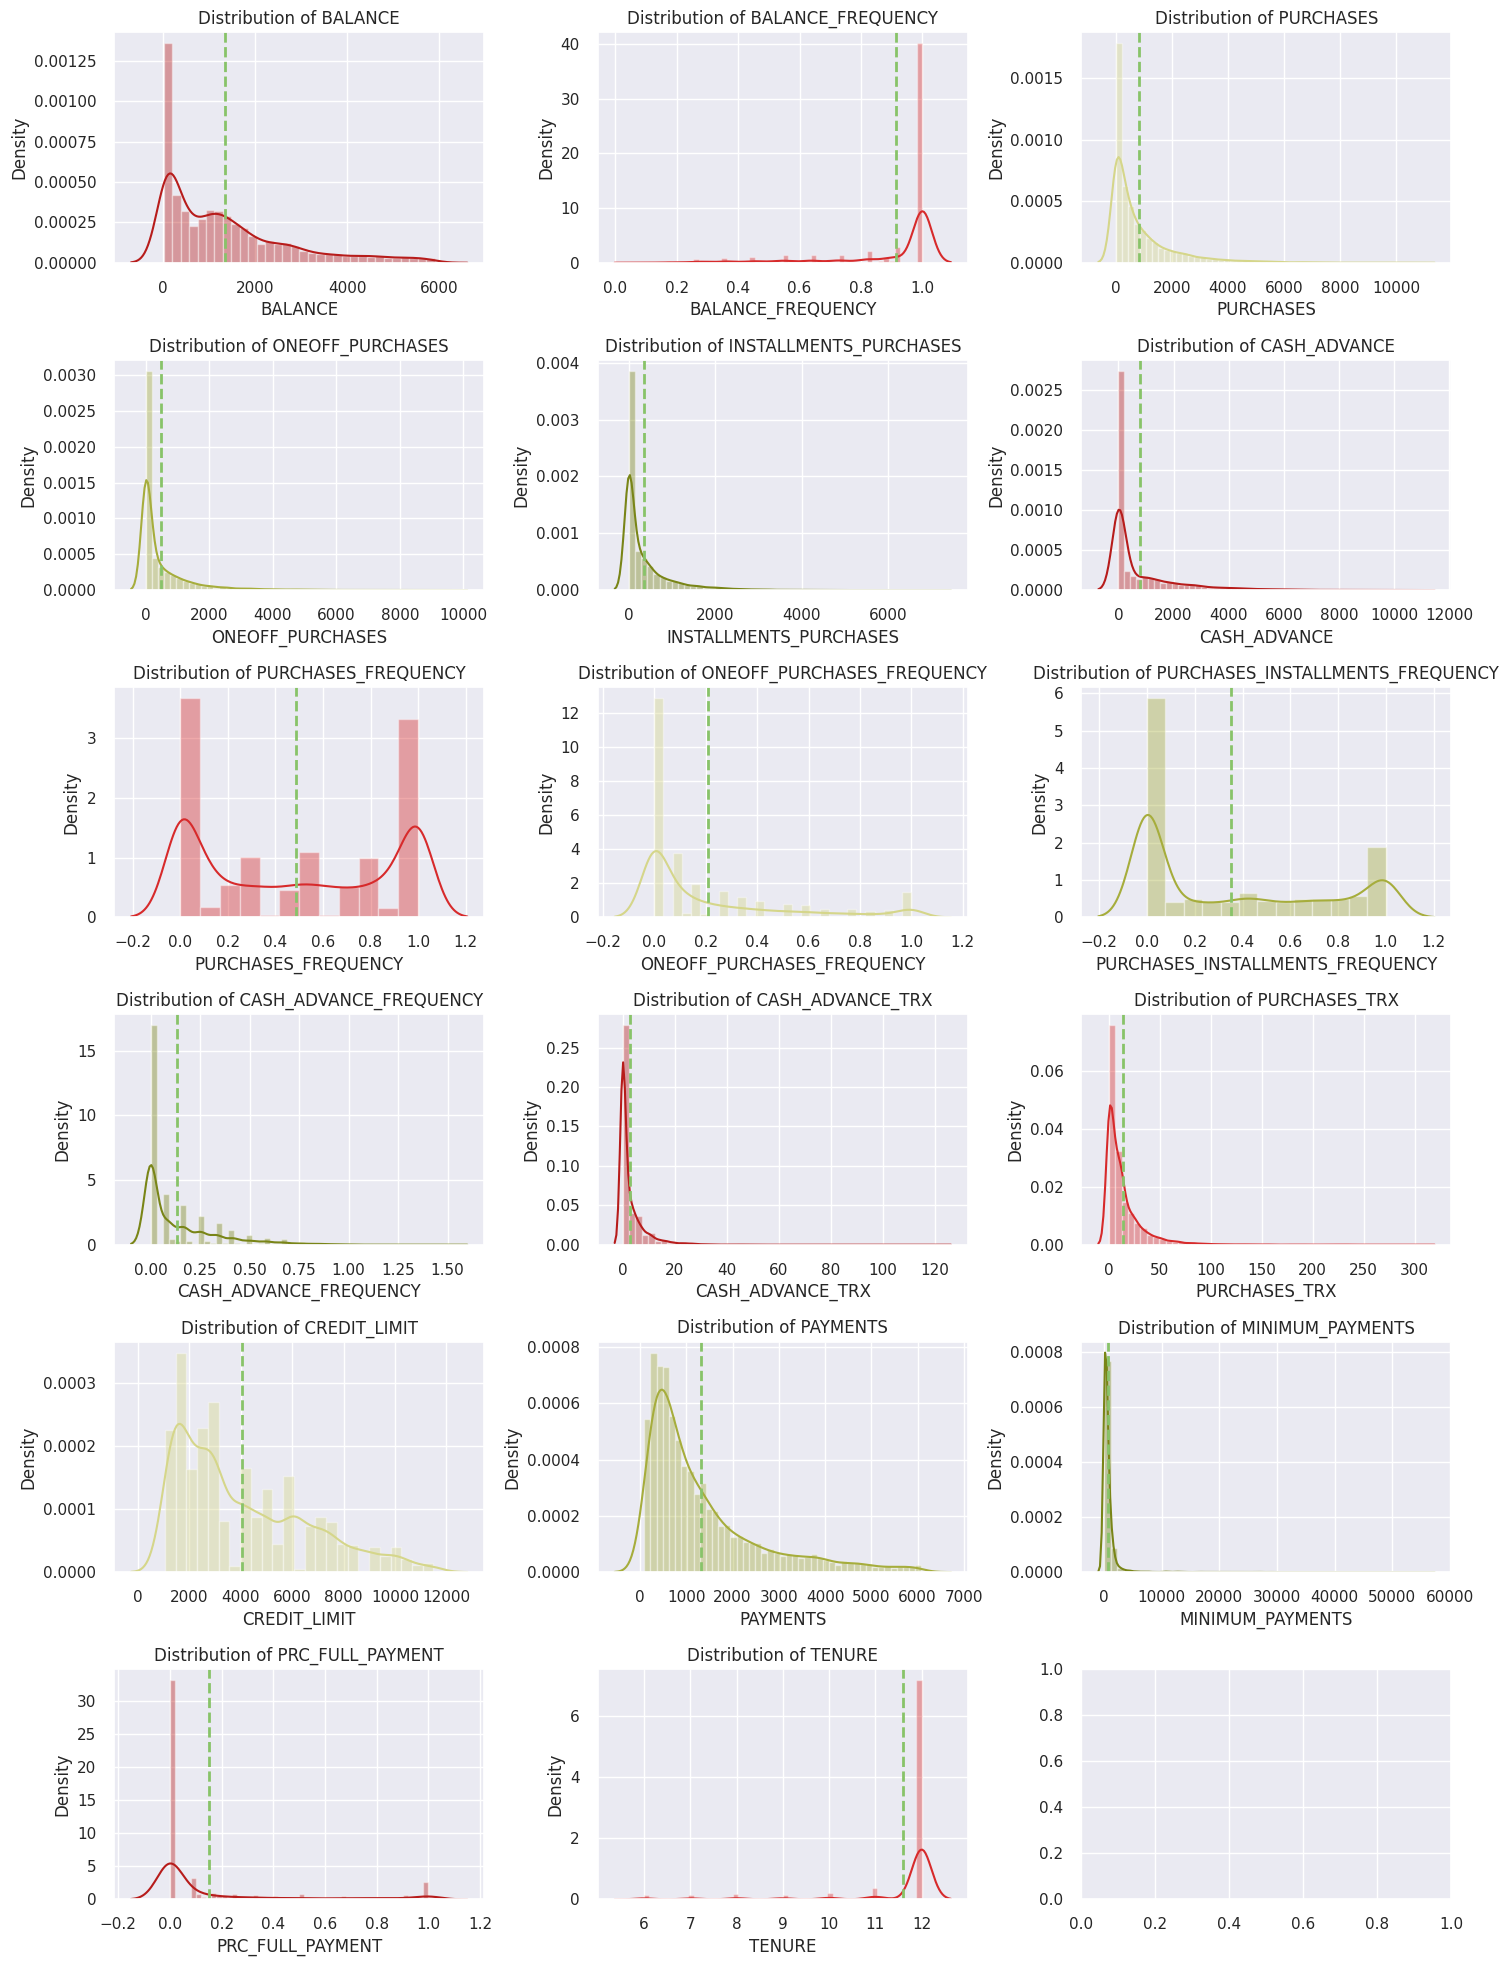

In [161]:
# Create subplots for all features
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

for i, column in enumerate(df_no_outlier.columns):
    sns.distplot(df_no_outlier[column], color=colors1[i%5], ax=axes[i//3, i%3])
    axes[i//3, i%3].axvline(x=df_no_outlier[column].mean(), color='#88c369', linestyle='--', linewidth=2)
    axes[i//3, i%3].set_title('Distribution of '+ column)

fig.suptitle('', fontsize=16)
fig.tight_layout()

<Axes: >

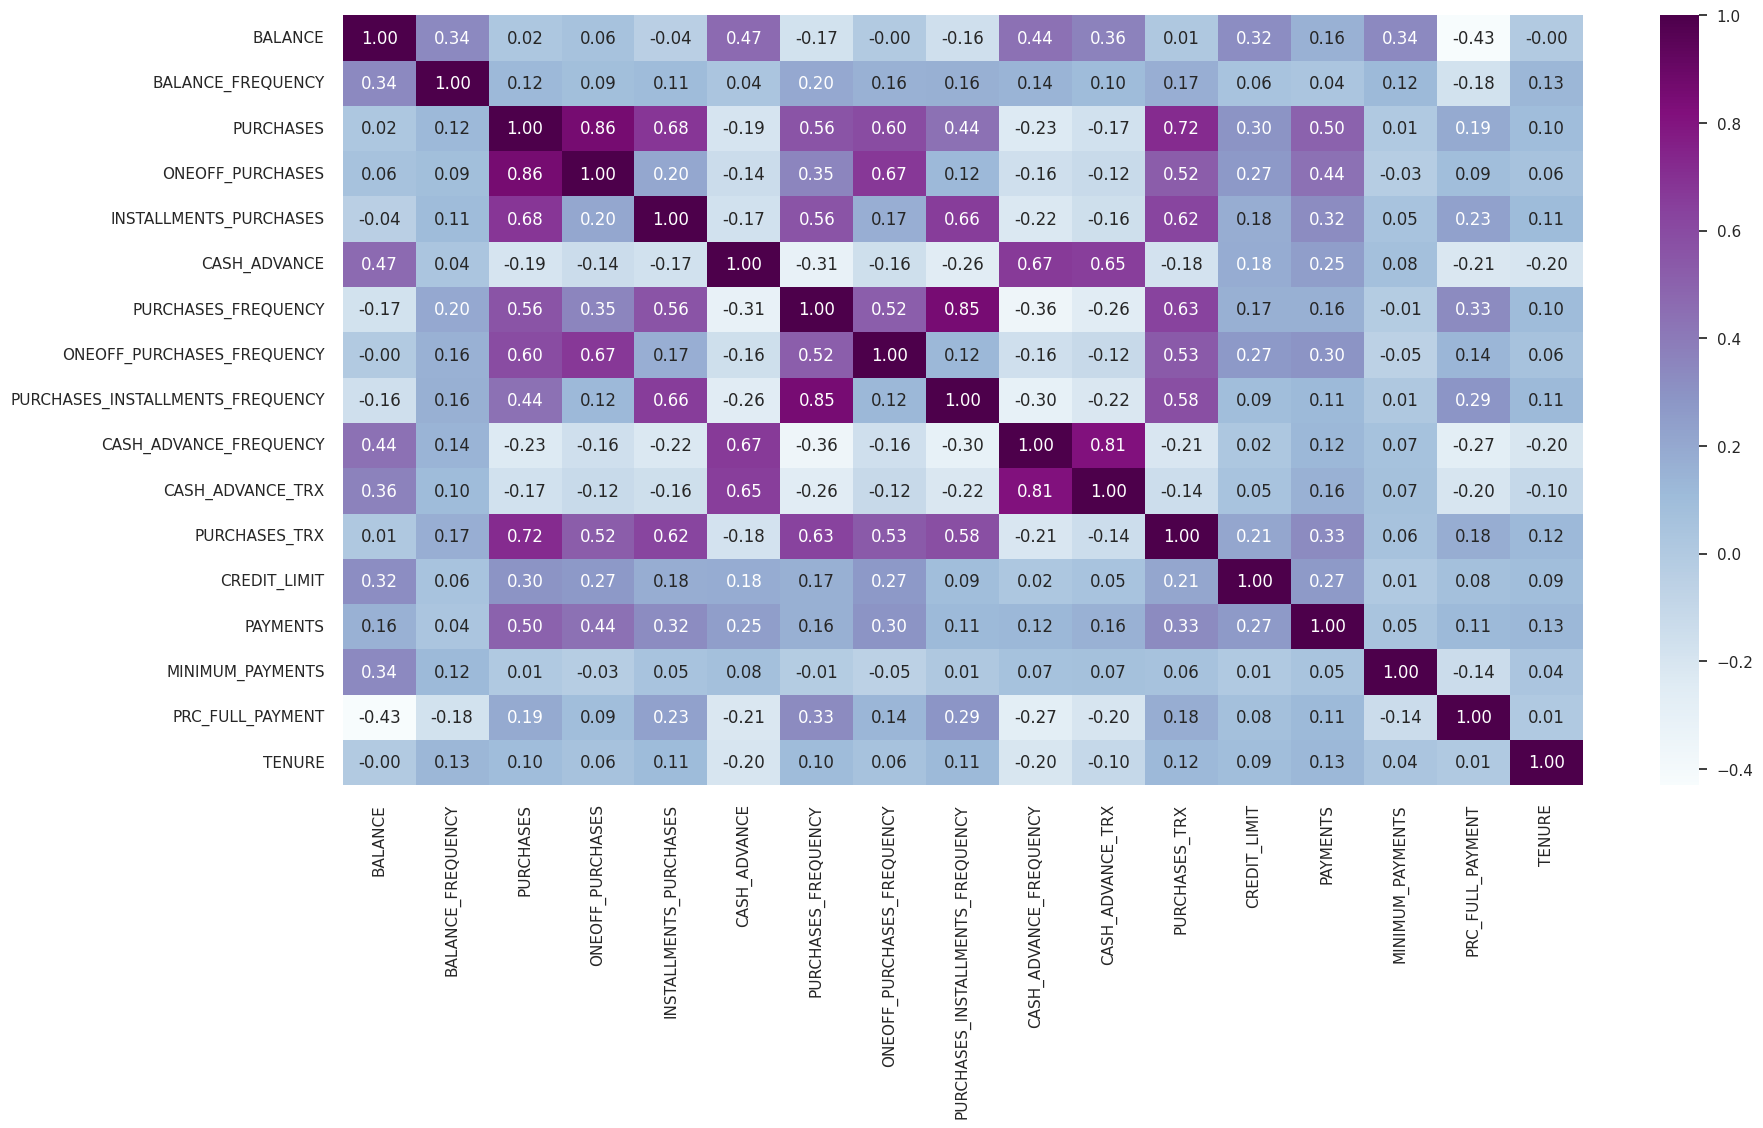

In [162]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corr=df_no_outlier.corr()
sns.heatmap(corr,annot=True,cmap="BuPu",fmt='.2f')

Text(0.5, 1.0, 'Features Correlating with MINIMUM_PAYMENTS')

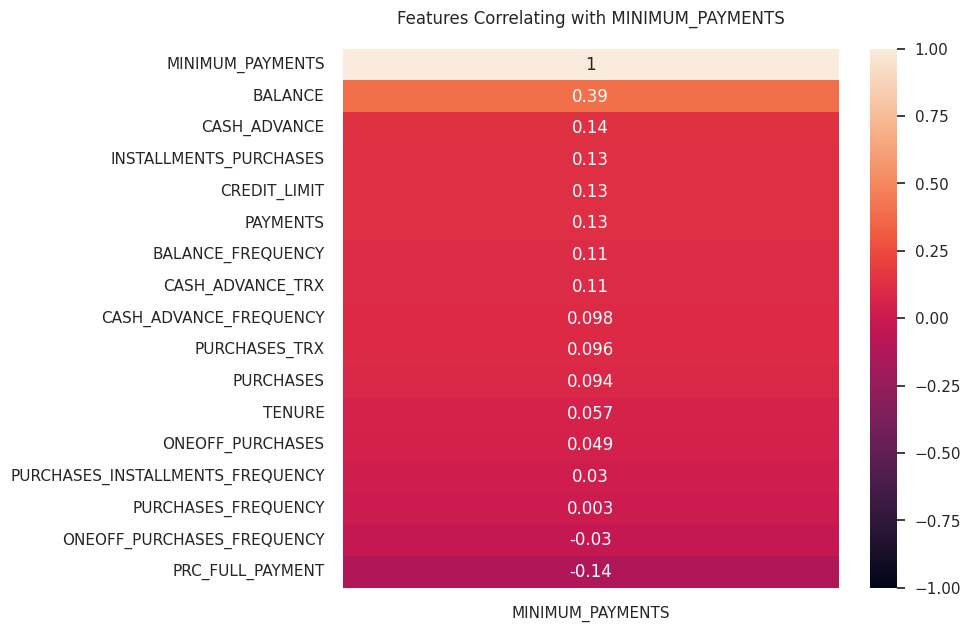

In [163]:
plt.figure (figsize = (8, 7), dpi = 100)
heatmap = sns.heatmap (df.corr()[['MINIMUM_PAYMENTS']].sort_values (by = 'MINIMUM_PAYMENTS', ascending = False),
                       vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with MINIMUM_PAYMENTS', fontdict = {'fontsize':12}, pad = 18)

**In general, a correlation coefficient (r value) between 0.3 and 0.7 is considered a moderate correlation, while a coefficient greater than 0.7 is considered a strong correlation**
* **Here, we can't see a strong correlation between the MINIMUM_PAYMENTS feature and all other features in the dataframe.**

* **Therefore, we can't get help from any feature to fill the Nan values of the MINIMUM_PAYMENTS feature.**

In [164]:
# scale the DataFrame
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df_no_outlier)

## 6. Dimensionality Reduction

In [165]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-2.286555,3.003821
1,1.134723,0.431853
2,-1.458101,-1.493204
3,0.740693,-0.539502
4,0.648374,-1.077133


### Finding the Optimal Number of Clusters with Elbow Method

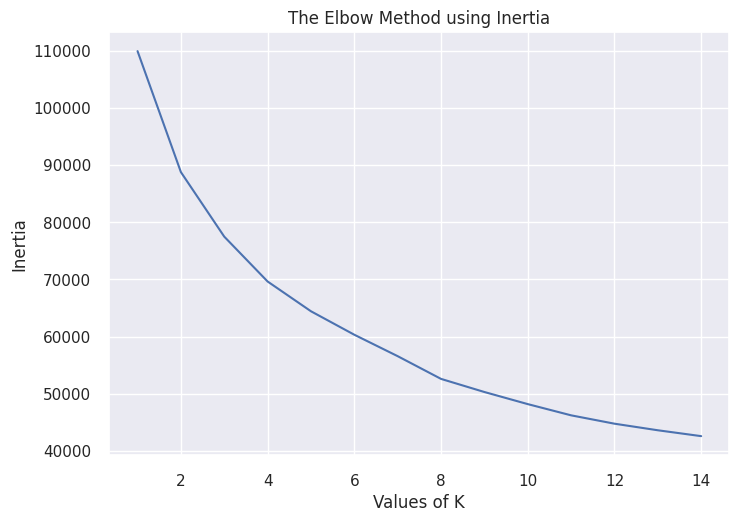

In [166]:
#find 'k' value by Elbow Method
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(creditcard_scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

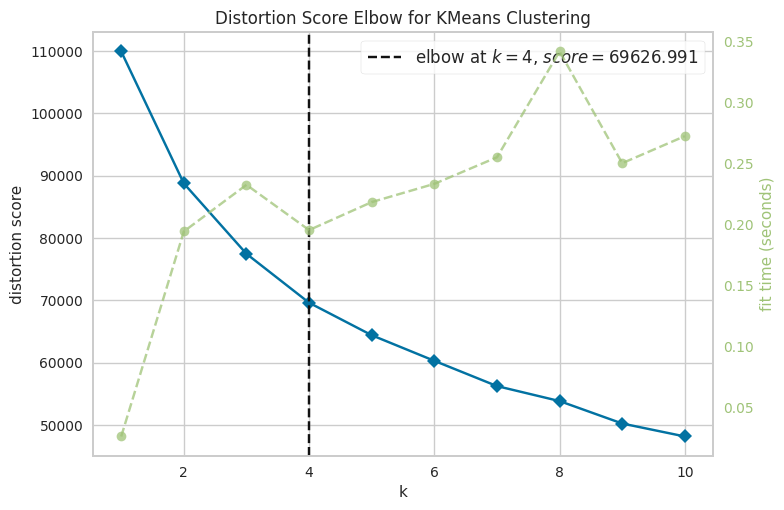

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
# Initialize KMeans model with the given parameters
k = (1, 11)
kmeans_model = KMeans(n_clusters=k, **kmeans_params)

# Create elbow plot visualizer with range of k values and timings enabled
elbow_visualizer = KElbowVisualizer(kmeans_model, k=k, timings=True)

# Fit the data to the visualizer
elbow_visualizer.fit(creditcard_scaled_df)

# Add a title to the elbow plot
elbow_visualizer.ax.set_title('Elbow Plot for KMeans Clustering')

# Finalize and render the figure
elbow_visualizer.show()

## 8. Model Building

## a) K-Means Culstering

In [105]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

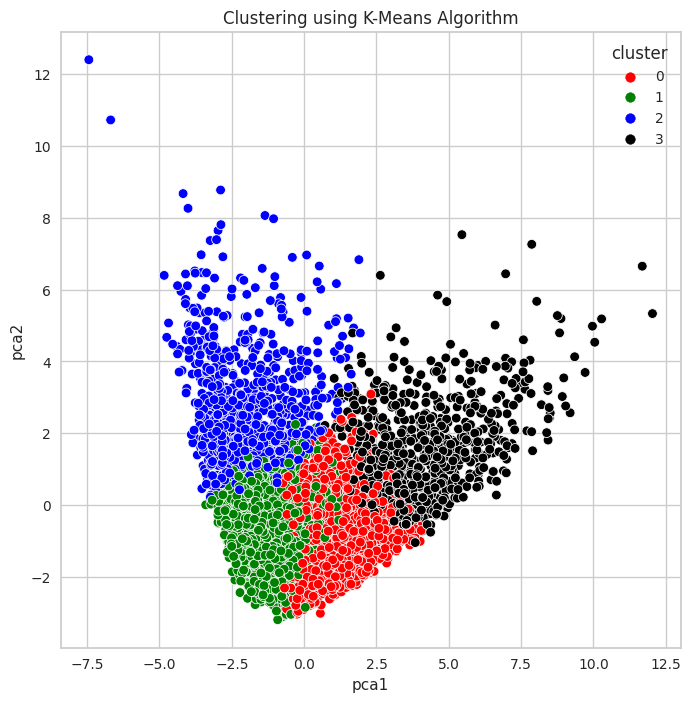

In [107]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [168]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])

In [169]:
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1142.821797,0.862365,284.527083,234.925590,49.873140,505.921538,0.173348,0.101685,0.069882,0.106333,1.858651,3.122126,3192.090715,898.879964,611.843589,0.061237,11.562382
1,756.333196,0.936610,897.514557,311.422812,586.381457,155.751893,0.856768,0.221483,0.704300,0.034415,0.608674,18.426901,3893.893885,1041.657039,610.379753,0.281429,11.725634
2,2879.006264,0.957643,310.598666,206.054980,104.577994,3143.418743,0.234299,0.116171,0.134443,0.459142,12.219368,5.053360,5107.921607,1855.158998,1218.447033,0.031428,11.155138
3,1575.657597,0.975533,3393.301509,2197.577316,1196.590681,294.622618,0.923300,0.676218,0.686154,0.053737,1.073431,49.429907,6076.368491,2849.429760,736.837829,0.268146,11.869159


In [108]:
# Spectral clustering
def train_spectral(k,X):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(X)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

# Agglomerative clustering
def train_Agglomerative(linkage,k,X):
  agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
  y_pred = agglo_model.fit_predict(X)
  print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )


In [110]:
# Spectral clustering
clusters=[3,4,5,6]
for i in clusters:
    train_spectral(i,scaled_df)

Spectral Clustering : clusters :  3  silhouette_score :  0.7435601679338187
Spectral Clustering : clusters :  4  silhouette_score :  0.7435601679338187
Spectral Clustering : clusters :  5  silhouette_score :  0.7432037722943872
Spectral Clustering : clusters :  6  silhouette_score :  0.7435601679338187


In [116]:
# Agglomerative clustering
clusters=[3,4,5,6]
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
  for i in clusters:
    train_Agglomerative(lin,i,scaled_df)

Agglomerative Clustering : clusters :  3  linkage :  ward  silhouette_score :  0.17431376108556423
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.1489272830908925
Agglomerative Clustering : clusters :  5  linkage :  ward  silhouette_score :  0.14815566752346945
Agglomerative Clustering : clusters :  6  linkage :  ward  silhouette_score :  0.15430339363639792
Agglomerative Clustering : clusters :  3  linkage :  complete  silhouette_score :  0.6980529937164554
Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.31370289803604545
Agglomerative Clustering : clusters :  5  linkage :  complete  silhouette_score :  0.3056035595515703
Agglomerative Clustering : clusters :  6  linkage :  complete  silhouette_score :  0.2791675976061798
Agglomerative Clustering : clusters :  3  linkage :  average  silhouette_score :  0.6980529937164554
Agglomerative Clustering : clusters :  4  linkage :  average  silhouette_score :  0.65731138017

In [117]:
clusters=[3,4,5,6]
for i in clusters:
  train_GaussianMixture(i,scaled_df)

GaussianMixture Model based Clustering : clusters :  3  silhouette_score :  0.11605827583746624
GaussianMixture Model based Clustering : clusters :  4  silhouette_score :  0.10083229067134664
GaussianMixture Model based Clustering : clusters :  5  silhouette_score :  0.08211977206352869
GaussianMixture Model based Clustering : clusters :  6  silhouette_score :  0.05830096077884378


## 8. Model Building 

### a. K-Means

In [171]:
# apply kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

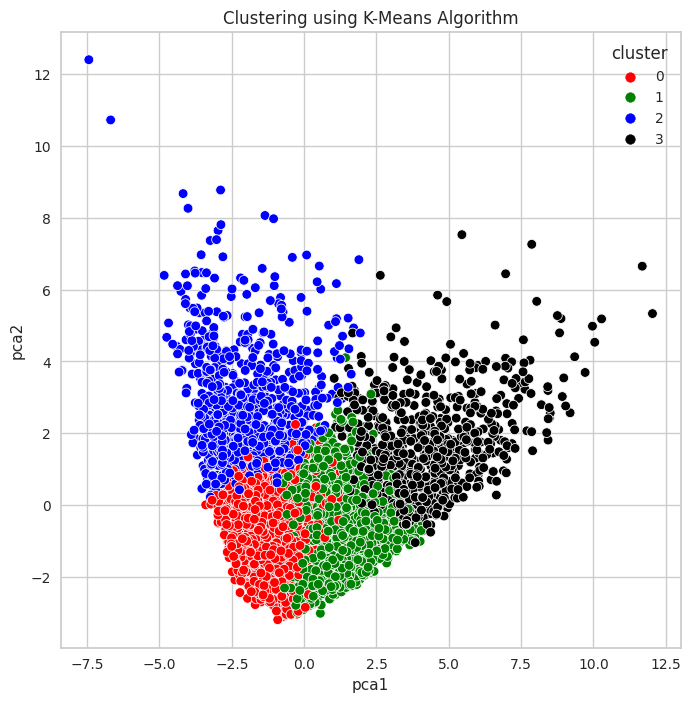

In [119]:
# visualize the clustered dataframe
# Scatter Plot
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

### b) Agglomerative Clustering 

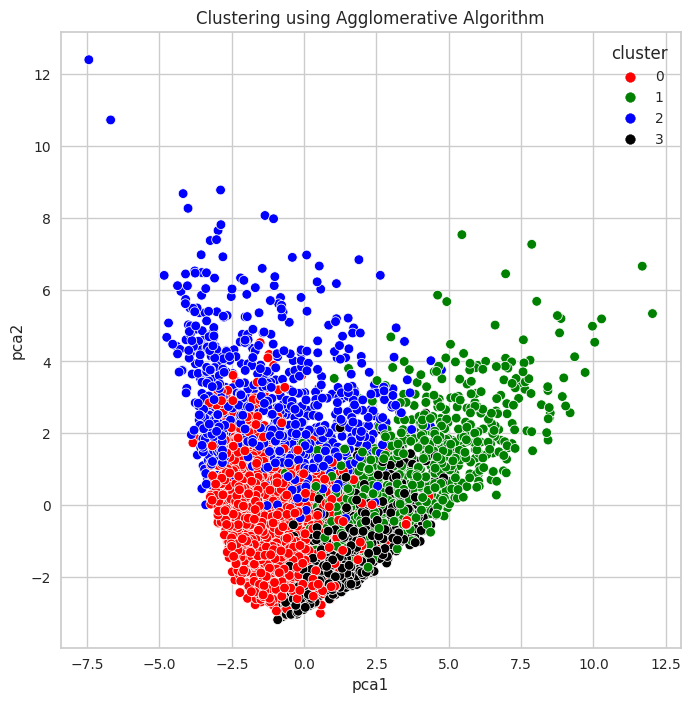

In [120]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
y_pred = agglo_model.fit_predict(scaled_df)
pca_df_aglo= pd.concat([pca_df,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

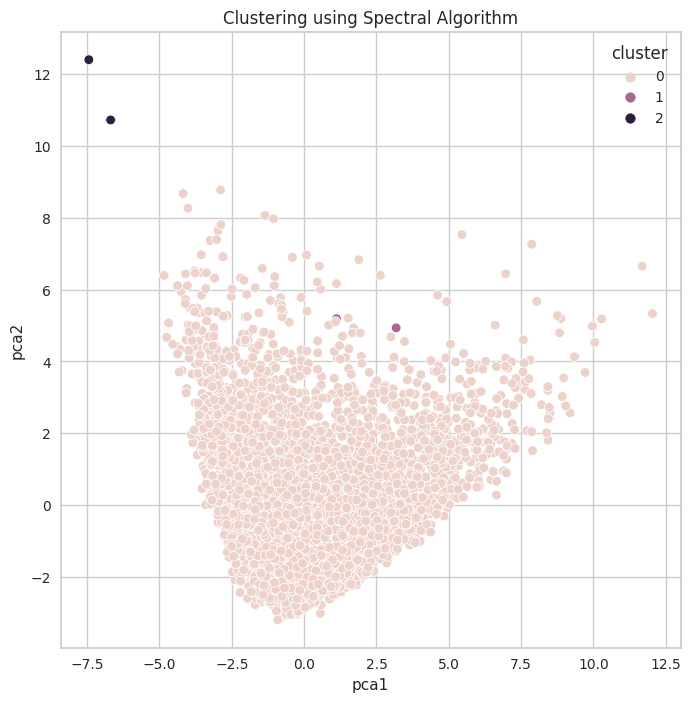

In [122]:
spectral_model = SpectralClustering(n_clusters=4)
y_pred = spectral_model.fit_predict(scaled_df)
pca_df_spl= pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl)
plt.title("Clustering using Spectral Algorithm")
plt.show()

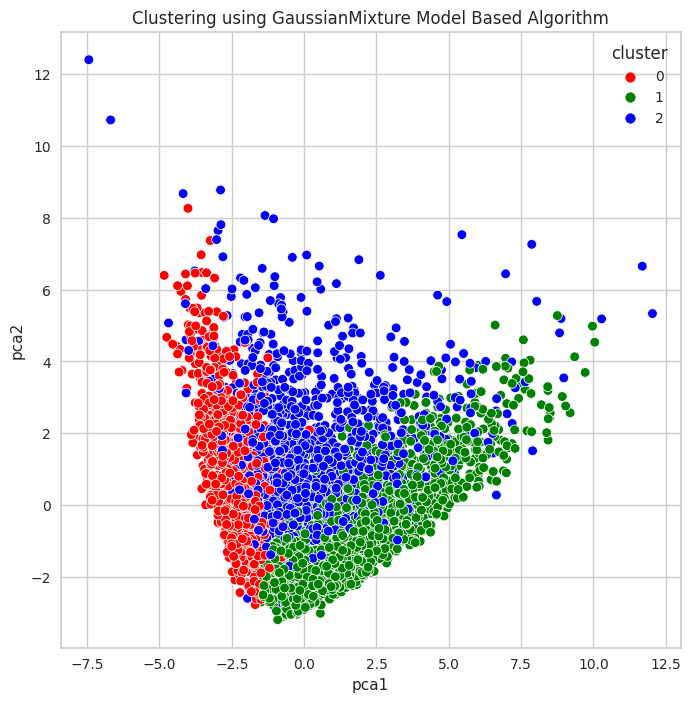

In [123]:
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(scaled_df)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()

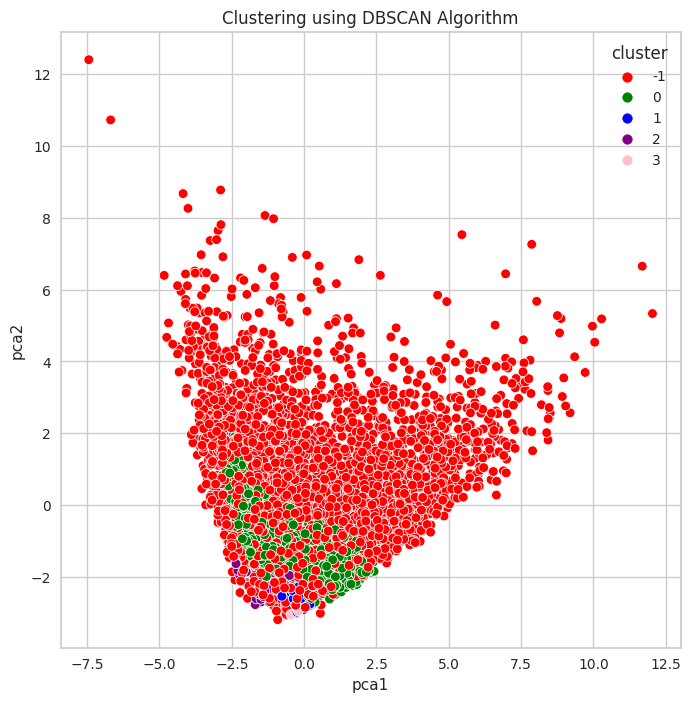

In [124]:
model_dbscan = DBSCAN(eps=1, min_samples=18)
y_pred = model_dbscan.fit_predict(scaled_df)
pca_df_dbscan= pd.concat([pca_df,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_dbscan,palette=['red','green','blue','purple','pink'])
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

In [172]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transfor the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers
# create a column as "cluster" & store the respective cluster name that they belongs to
cluster_df = pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2.0


In [173]:
cluster_1_df = cluster_df[cluster_df["cluster"]==0]
cluster_1_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12,0.0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.0,12,0.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.0,0.333333,0.083333,0.250000,0.0,0,5,7000.0,688.278568,311.963409,0.0,12,0.0
11,630.794744,0.818182,1492.18,1492.18,0.00,0.0,0.250000,0.250000,0.000000,0.0,0,6,2000.0,705.618627,155.549069,0.0,12,0.0


In [174]:

cluster_2_df = cluster_df[cluster_df["cluster"]==1]
cluster_2_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.0,0.000000,0,3,11000.0,1164.770591,100.302262,0.0,12,1.0
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.0,0.363636,4,0,6000.0,1422.726707,1657.002877,0.0,11,1.0
31,1162.273324,1.000000,1347.71,400.00,947.71,175.815755,1.000000,0.083333,1.0,0.166667,2,45,6000.0,645.998299,256.848991,0.0,12,1.0
33,125.660453,1.000000,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.0,0.000000,0,11,1200.0,423.449696,196.301885,0.3,12,1.0
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.0,0.727273,11,0,9000.0,1636.361601,1986.843608,0.0,11,1.0


In [175]:
cluster_3_df = creditcard_cluster_df[cluster_df["cluster"]==2]
cluster_3_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,3202.467416,0.909091,0.00,0.0,0.00,6442.945483,0.000000,0.000000,0.0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.0
3,1666.670542,0.636364,1499.00,1499.0,0.00,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.0,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2.0
7,1823.652743,1.000000,436.20,0.0,436.20,0.000000,1.000000,0.000000,1.0,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2.0
10,1293.124939,1.000000,920.12,0.0,920.12,0.000000,1.000000,0.000000,1.0,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12,2.0


In [176]:
cluster_4_df = cluster_df[cluster_df["cluster"] == 3]
cluster_4_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3.0
17,41.089489,0.454545,519.00,0.0,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.250000,12,3.0
38,6269.418144,1.000000,204.00,204.0,0.00,2925.699862,0.083333,0.083333,0.000000,0.333333,12,2,9000.0,1237.111661,2049.408839,0.000000,12,3.0
41,784.889762,0.909091,1526.59,786.3,740.29,2188.419607,0.583333,0.416667,0.333333,0.250000,11,27,3000.0,1262.309666,363.142736,0.111111,12,3.0
47,3910.111237,1.000000,0.00,0.0,0.00,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,864.206542,0.000000,12,3.0


<Axes: xlabel='cluster', ylabel='count'>

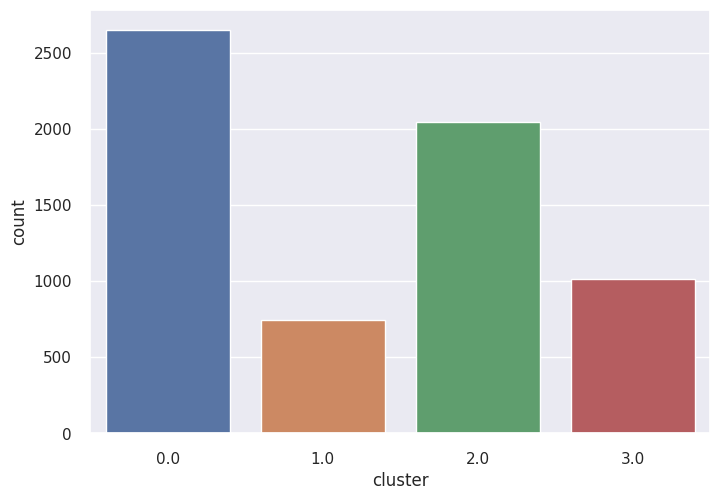

In [177]:
sns.countplot(x='cluster', data=cluster_df)

In [178]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [179]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [190]:
cluster_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,6466.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.220229
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.142743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,1.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,2.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


In [180]:
#Split Dataset
X = cluster_df.drop(['cluster'],axis=1)
y= cluster_df[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=3)

In [187]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6265, 17) (6265, 1)
(2685, 17) (2685, 1)


In [181]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5734,1079.097023,1.0,247.44,0.00,247.44,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,503.445403,302.481716,0.000000,12
6631,2590.469749,1.0,459.12,422.00,37.12,0.000000,0.333333,0.333333,0.083333,0.000000,0,11,2900.0,584.707120,1369.991379,0.000000,12
8659,945.802599,1.0,540.00,0.00,540.00,912.094948,1.000000,0.000000,0.875000,0.125000,4,15,1000.0,365.497356,1236.864840,0.000000,8
8503,3074.490820,1.0,0.00,0.00,0.00,3382.232089,0.000000,0.000000,0.000000,0.166667,2,0,4000.0,3249.404994,695.004032,0.000000,12
7433,1325.679991,1.0,1084.87,687.57,397.30,3330.913556,0.833333,0.333333,0.833333,0.416667,9,16,3000.0,4135.414563,405.944341,0.090909,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,1653.400854,1.0,100.00,100.00,0.00,2031.677435,0.090909,0.090909,0.000000,0.363636,13,1,2000.0,575.557594,432.921030,0.000000,11
2707,276.446975,1.0,1429.39,100.00,1329.39,0.000000,1.000000,0.083333,1.000000,0.000000,0,21,2800.0,1296.041874,193.607553,0.100000,12
6400,1434.793889,1.0,467.88,467.88,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4300.0,2538.815988,2898.375147,0.000000,12
1688,4530.639094,1.0,0.00,0.00,0.00,3162.719581,0.000000,0.000000,0.000000,0.250000,5,0,8000.0,995.539176,1032.384353,0.000000,12


In [182]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5535,76.673877,0.777778,410.90,0.00,410.90,0.000000,0.666667,0.000000,0.555556,0.000000,0,6,1500.0,449.090030,100.105897,0.000000,9
7828,645.406005,1.000000,0.00,0.00,0.00,929.220085,0.000000,0.000000,0.000000,0.333333,4,0,1000.0,193.013564,310.454708,0.000000,12
1680,4977.237859,1.000000,61.99,61.99,0.00,7448.329320,0.083333,0.083333,0.000000,0.500000,22,1,6500.0,6850.235626,1587.042735,0.000000,12
4518,380.517893,1.000000,2590.27,2102.46,487.81,0.000000,0.916667,0.916667,0.416667,0.000000,0,49,2500.0,1825.405687,173.164117,0.090909,12
6131,41.011184,1.000000,1314.75,125.19,1189.56,0.000000,1.000000,0.500000,1.000000,0.000000,0,70,6000.0,1303.104693,135.761304,0.700000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,8097.334733,1.000000,3999.92,200.00,3799.92,0.000000,1.000000,0.083333,1.000000,0.000000,0,14,7500.0,5624.074339,9952.672511,0.000000,12
5034,13.221335,0.857143,108.84,0.00,108.84,0.000000,0.857143,0.000000,0.714286,0.000000,0,9,1500.0,69.973565,85.417572,0.000000,7
1278,1770.072581,1.000000,0.00,0.00,0.00,781.616559,0.000000,0.000000,0.000000,0.083333,1,0,2500.0,1390.781416,845.927334,0.000000,12
285,4246.430225,1.000000,0.00,0.00,0.00,9270.408108,0.000000,0.000000,0.000000,0.666667,16,0,7000.0,6010.525656,1793.262654,0.083333,12


In [189]:
y_train.isna().count()

cluster    6265
dtype: int64

In [184]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: Input y contains NaN.

In [ ]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## 6. Challenges
1. This dataset contains too many columns which took time to understand meaningful insights and patterns. 
2. We understand to reduce the number of features in the dataset using dimensionality reduction and trying to implement as our next step.  

## 7. Conclusion 

The overall idea dataset is well understood through exploratory data analysis, data visualization and data cleaning stages. 
Further, This implementation will further go through steps such as dimensionality reduction, hyperparameter tuning to find K value and build the models, doing comparisons and analysis. 
